In [1]:
import pandas as pd
df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [2]:
df = df.dropna(subset=['RainTomorrow'])
selected_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                     'Temp9am', 'Temp3pm']
df = df.dropna(subset=selected_features)

In [3]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [4]:
X = df[selected_features]
y = df['RainTomorrow']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)
print("Logistic Regression:", round(accuracy_score(y_test, y_pred_log) * 100, 2), "%")

Logistic Regression: 84.35 %


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN:", round(accuracy_score(y_test, y_pred_knn) * 100, 2), "%")

KNN: 83.63 %


In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree:", round(accuracy_score(y_test, y_pred_dt) * 100, 2), "%")

Decision Tree: 78.72 %


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:", round(accuracy_score(y_test, y_pred_rf) * 100, 2), "%")

Random Forest: 85.19 %


In [ ]:
#we can observe that Random Forest is giving more accuracy 
# now we can do our testing with Random Forest for best results

In [15]:
sample_no = [[15.2, 27.0, 0.0, 20.0, 45, 35, 1015.0, 1013.5, 21.5, 26.7]]
rf.predict(sample_no)

C:\Users\manvi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [16]:
sample_yes = [[9.5, 17.5, 6.2, 32.0, 88, 76, 1008.2, 1006.3, 12.2, 15.0]]
rf.predict(sample_yes)

C:\Users\manvi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [17]:
sample_no_4 = [[18.3, 32.0, 0.0, 50.0, 42, 28, 1016.9, 1014.8, 22.2, 30.5]]
rf.predict(sample_no_4)

C:\Users\manvi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [18]:
sample_yes_4 = [[9.3, 17.6, 8.8, 33.0, 87, 75, 1008.5, 1006.2, 12.1, 15.7]]
rf.predict(sample_yes_4)

C:\Users\manvi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

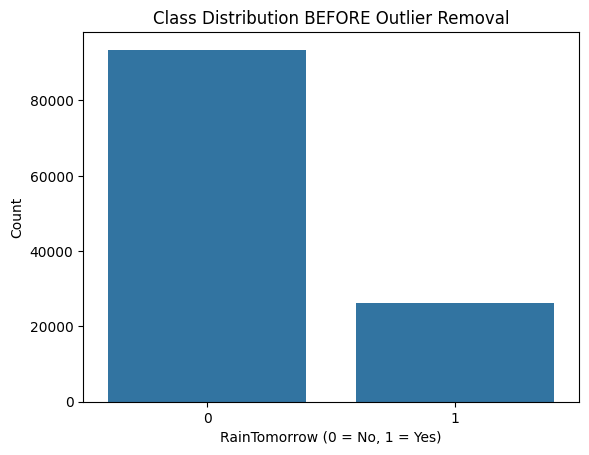

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='RainTomorrow', data=df)
plt.title("Class Distribution BEFORE Outlier Removal")
plt.xlabel("RainTomorrow (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [ ]:
#the above data is without removing outliers and only normalising 

In [ ]:
#with outlier removal

In [23]:
df_cleaned = df.copy()

for feature in selected_features:
    Q1 = df_cleaned[feature].quantile(0.25)
    Q3 = df_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_bound) & (df_cleaned[feature] <= upper_bound)]

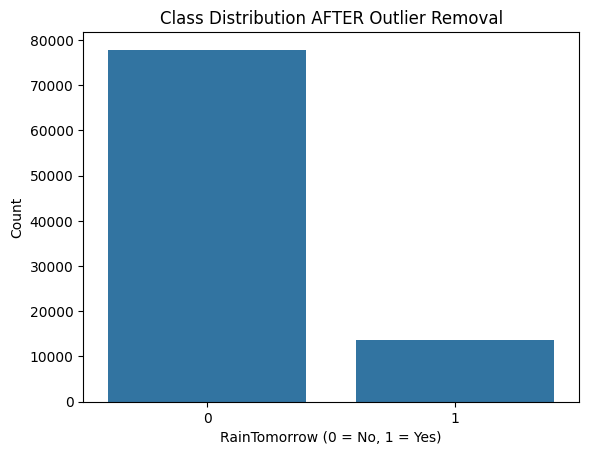

In [24]:
sns.countplot(x='RainTomorrow', data=df_cleaned)
plt.title("Class Distribution AFTER Outlier Removal")
plt.xlabel("RainTomorrow (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [25]:
X = df_cleaned[selected_features]
y = df_cleaned['RainTomorrow']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)
print("Logistic Regression:", round(accuracy_score(y_test, y_pred_log) * 100, 2), "%")

Logistic Regression: 87.58 %


In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN:", round(accuracy_score(y_test, y_pred_knn) * 100, 2), "%")

KNN: 86.4 %


In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree:", round(accuracy_score(y_test, y_pred_dt) * 100, 2), "%")

Decision Tree: 81.34 %


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:", round(accuracy_score(y_test, y_pred_rf) * 100, 2), "%")

Random Forest: 87.96 %


In [31]:
sample_yes_1 = [[8.0, 16.0, 10.2, 30.0, 90, 80, 1007.0, 1005.5, 11.0, 14.5]]
rf.predict(sample_yes_1)

C:\Users\manvi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [32]:
sample_no_1 = [[16.0, 30.2, 0.0, 42.0, 40, 30, 1017.1, 1015.2, 20.5, 28.4]]
rf.predict(sample_no_1)

C:\Users\manvi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [33]:
sample_yes = [[9.5, 17.5, 6.2, 32.0, 88, 76, 1008.2, 1006.3, 12.2, 15.0]]
rf.predict(sample_yes)

C:\Users\manvi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [34]:
sample_no_2 = [[14.2, 25.3, 0.0, 38.0, 50, 35, 1014.3, 1013.0, 18.1, 24.6]]
rf.predict(sample_no_2)

C:\Users\manvi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)